# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Regularisation and Overfitting issues Homework

The aim of this homework is to check whether a given model overfits and apply strategies to avoid such behaviour.

### Import libraries

In [1]:
# Import libraries we will need in the following
import pandas as pd
import numpy as np
import sys

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve, cross_validate, cross_val_score, ShuffleSplit,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report

from utils import helpers_Garden as hg
from utils.plottings import plot_learning_curve
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

sys.path.append('utils')

import helpers_Garden as hg
from plottings import plot_learning_curve

#set plot size
plt.rcParams['figure.figsize'] = (20, 13)

%matplotlib inline
%config InlineBackend.figure_format = "retina"

### Read dataset

We are going to read a simple dataset.
This is the famous titanic dataset, you already met.

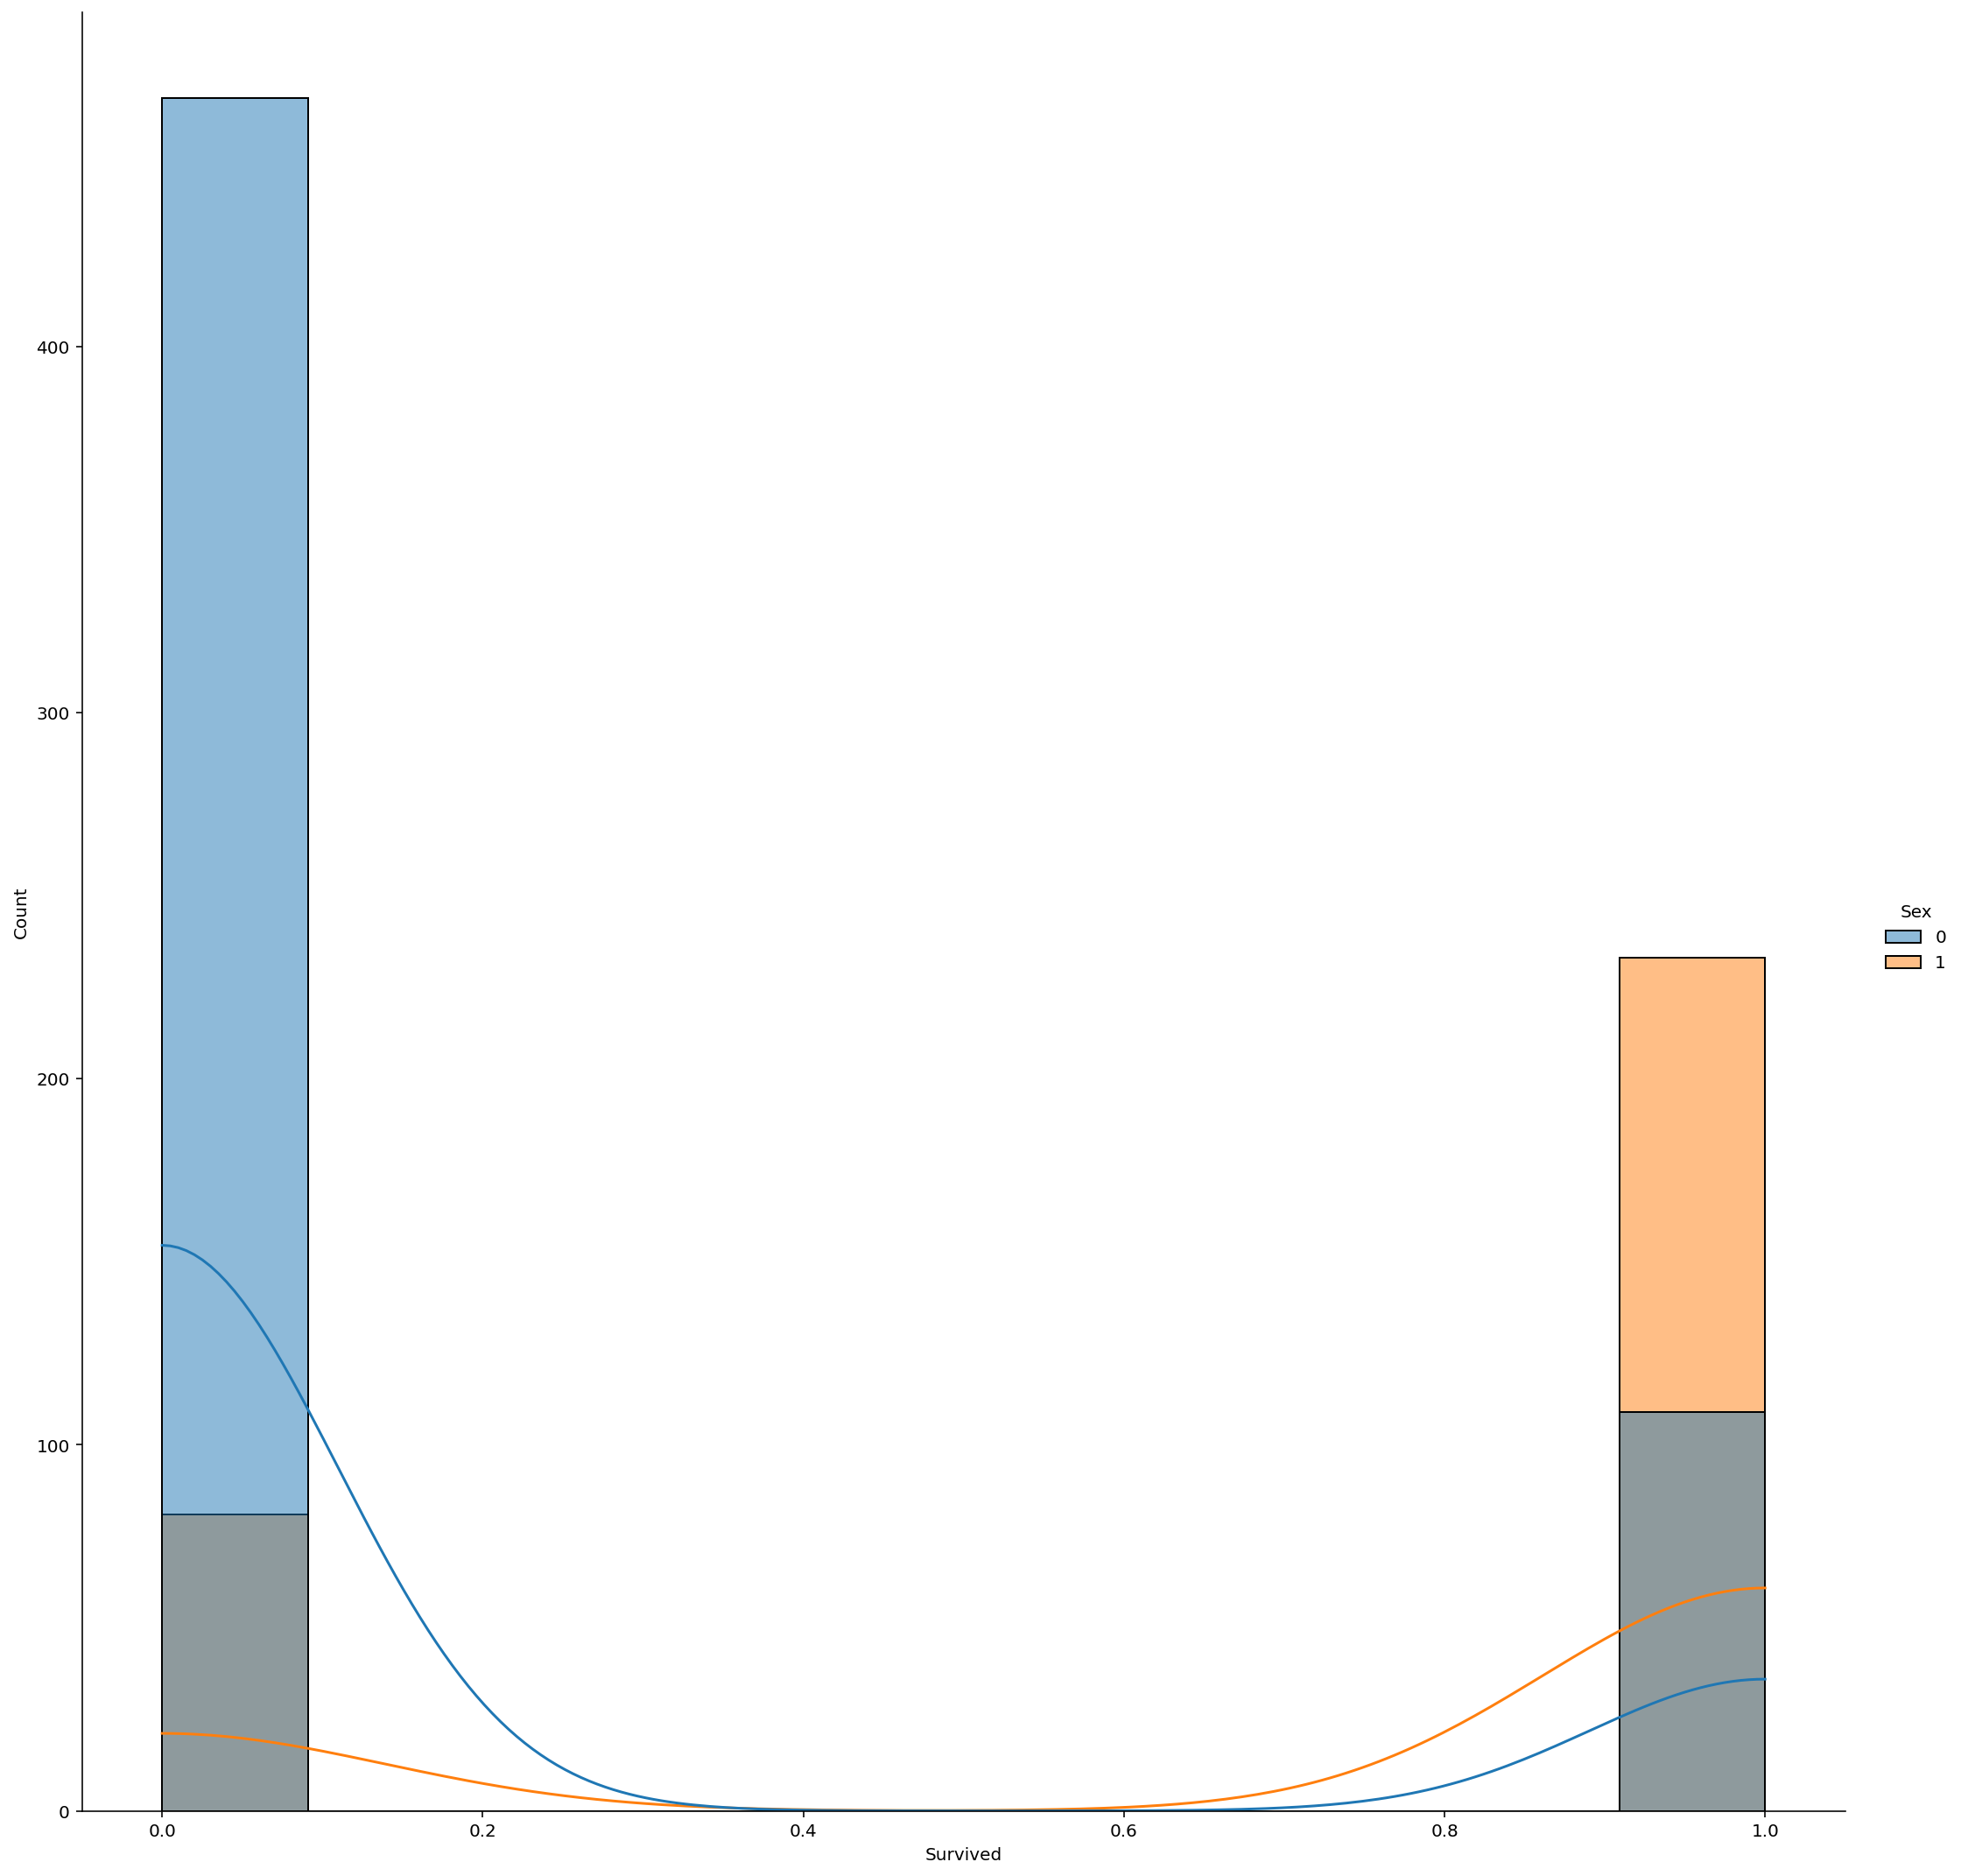

In [2]:
df = pd.read_csv('http://bit.ly/kaggletrain')
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

sns.displot(data=df, x="Survived", kde=True, hue="Sex", height=15);

In [3]:
features = ['Pclass', 'Fare', 'Sex', 'Parch']
X = df[features]
y = df['Survived']

## Gini Impurity and Entropy

We have seen that in algorithm based on trees, we look for the best split. 
The term “best” split means that after split, the two branches are more “ordered” than any other possible split.
How do we define more ordered? 
It depends on which metric we choose.
In general, there are two types of metric: _Gini impurity_ and _entropy_. 
These metrics are disorder metrics, that is the smaller these metrics are, the more “ordered” the dataset is.

$$ \mathcal{G} = 1 - \sum_j p^2_j \, . $$

$$ \mathcal{S} = - \sum_j p_j \log p_j \, . $$

The difference between the two metrics is pretty subtle. 
To learn more, you may read this [post](https://quantdare.com/decision-trees-gini-vs-entropy/). 
In most applications, both metric behave similarly. 

Complete the code below to calculate each metric.

In [4]:
def gini_impurity(y):
    """Function to calculate Gini impurity."""
    m = y.shape[0]
    cnts = dict(zip(*np.unique(y, return_counts = True)))
    impurity = 1 - sum((cnt/m)**2 for cnt in cnts.values())
    return impurity

def entropy(y):
    """Function to calculate Entropy."""
    cnts = dict(zip(*np.unique(y, return_counts = True)))
    entropy = - sum((cnt/m)*np.log2(cnt/m) for cnt in cnts.values())
    return entropy

### Train and test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Homework Assignements

1. Define and train decision tree models, 
2. Play with hyperparameters and calculate the suitable metrics in order to verify whether the model overfits or underfits data.
3. Plot learning curves of your models by using the utils function `plot_learning_curve`.

---

### Your Work


In [6]:
df_new=X
df_new['Survived']=y

In [7]:
df_new.describe()

,Pclass,Fare,Sex,Parch,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,32.204208,0.352413,0.381594,0.383838
std,0.836071,49.693429,0.477990,0.806057,0.486592
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,14.454200,0.000000,0.000000,0.000000
75%,3.000000,31.000000,1.000000,0.000000,1.000000
max,3.000000,512.329200,1.000000,6.000000,1.000000


In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Fare      891 non-null    float64
 2   Sex       891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Survived  891 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


With '.describe()' and '.info()' I have an overview of the data, there are no missing values so I plot them.

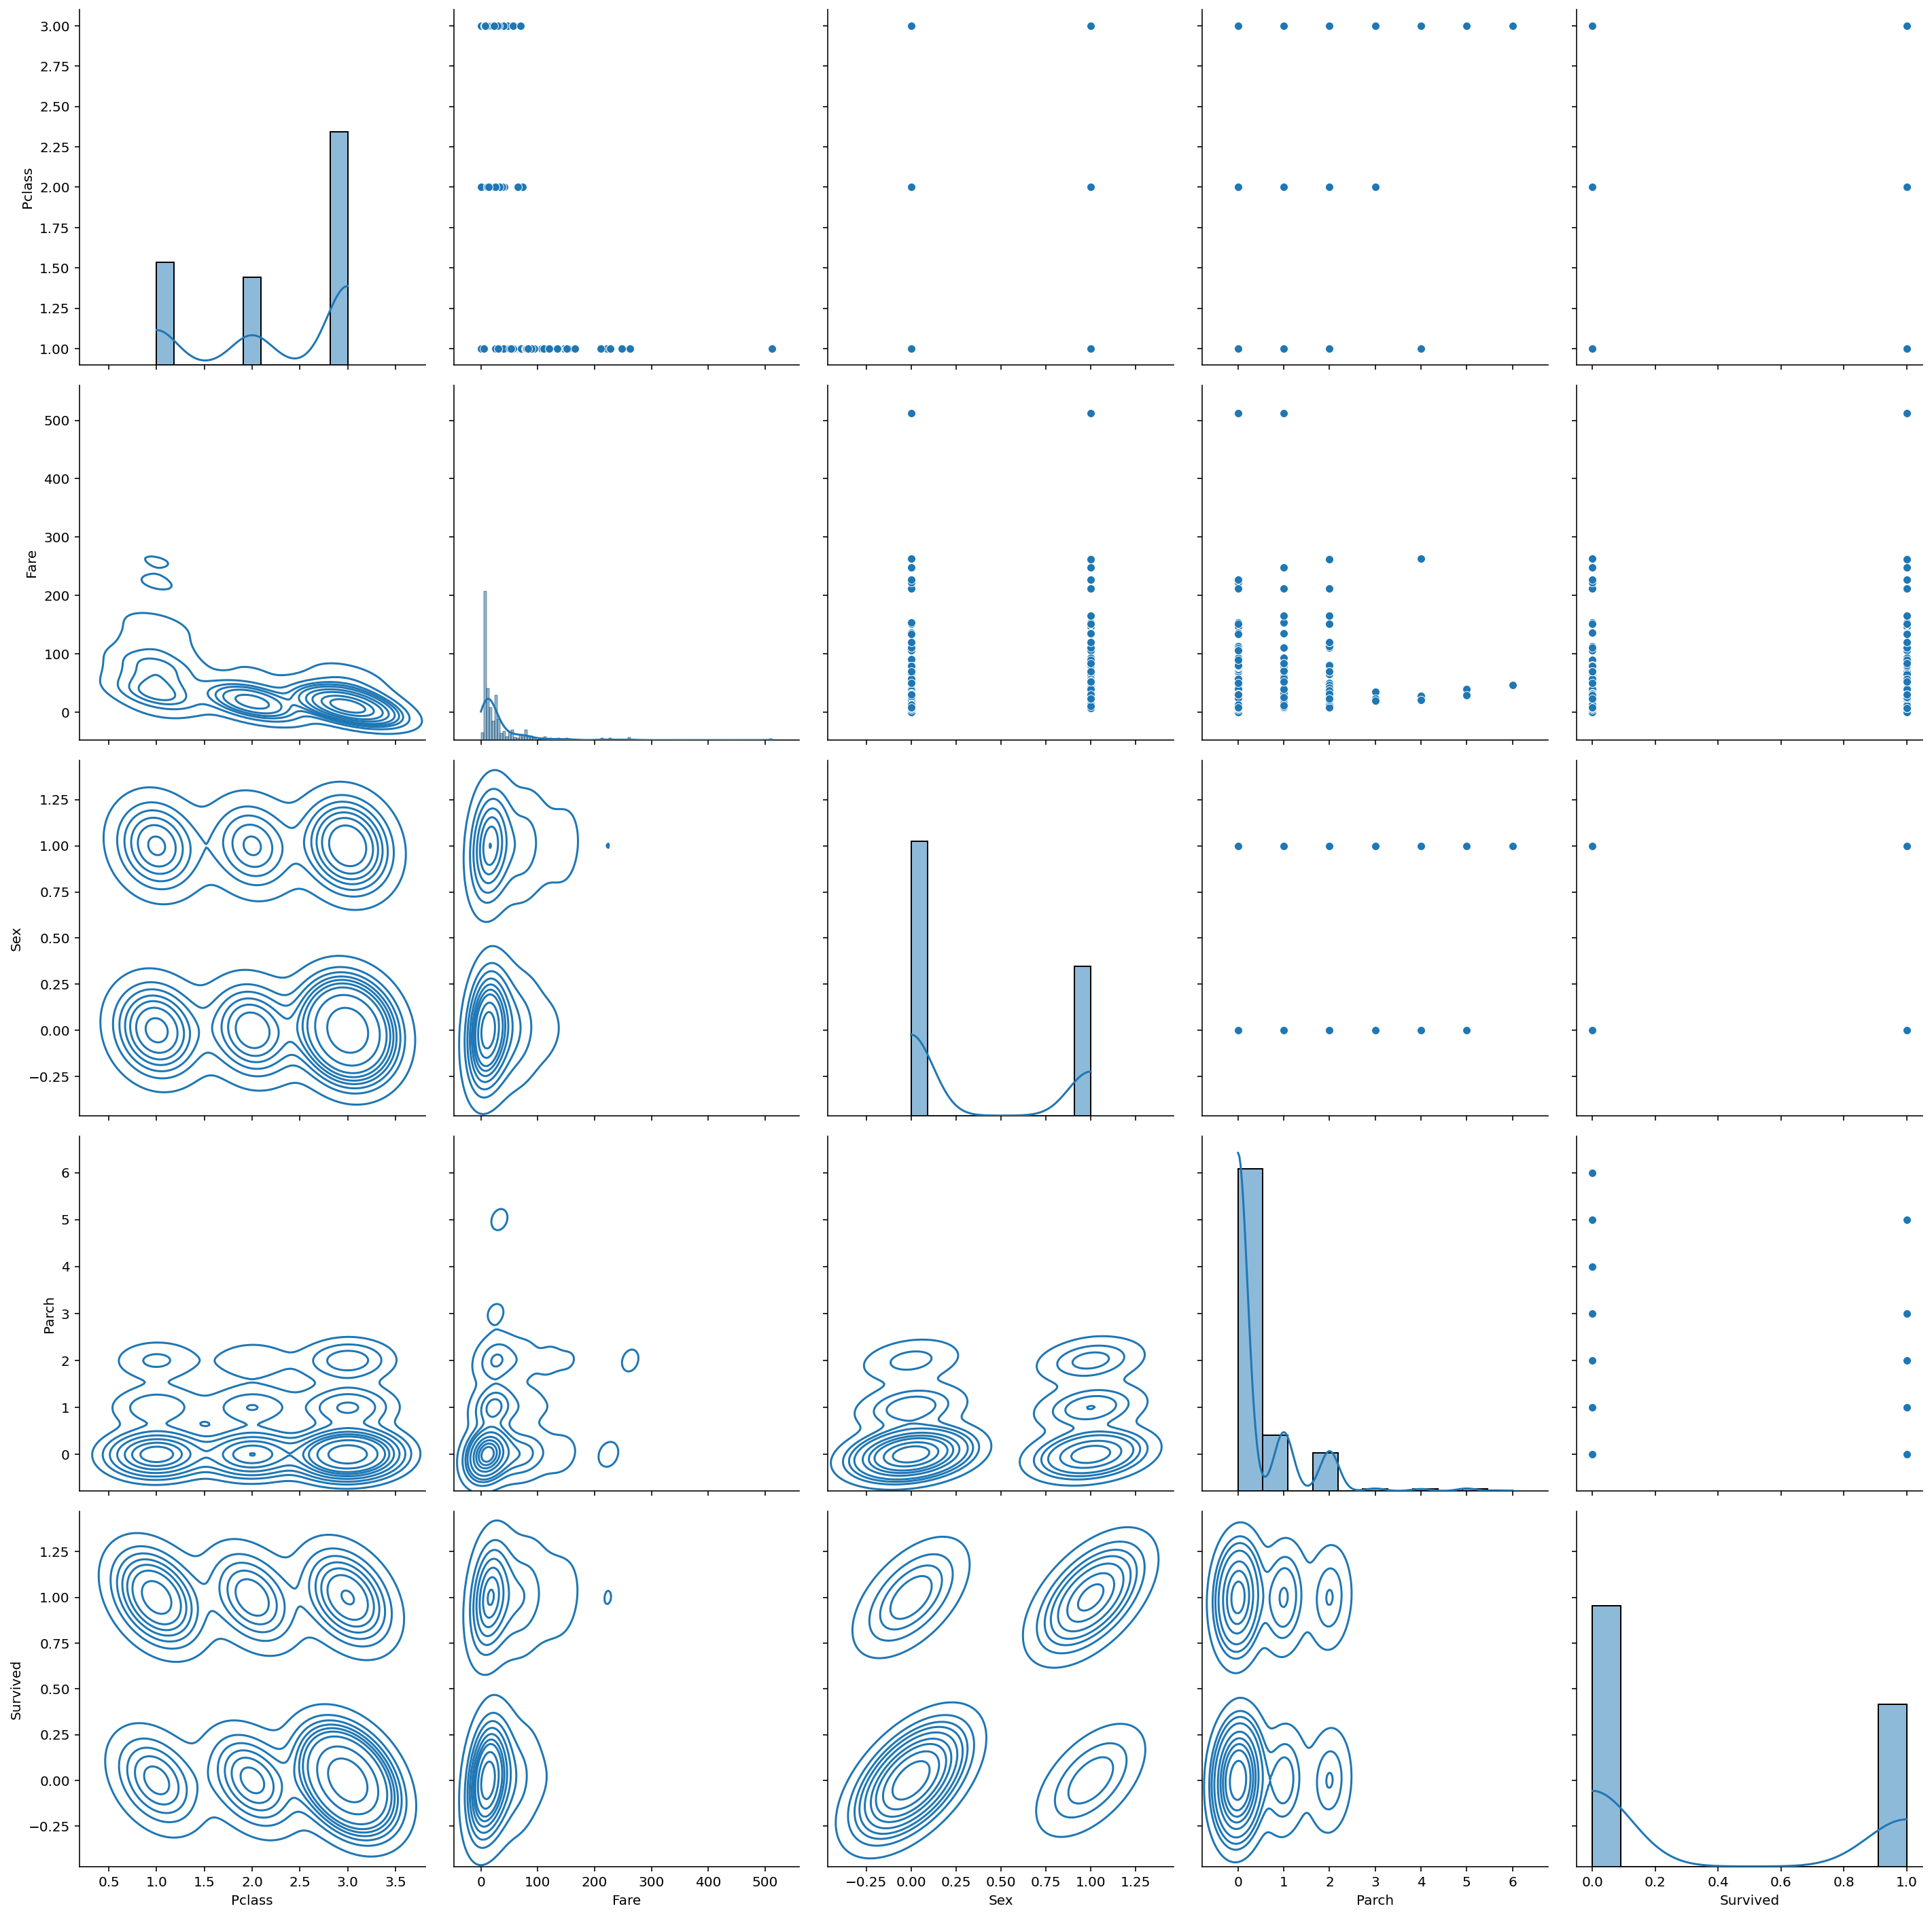

In [9]:
g = sns.PairGrid(df_new, height=4)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=False)
g.map_diag(sns.histplot, kde=True);

<AxesSubplot:>

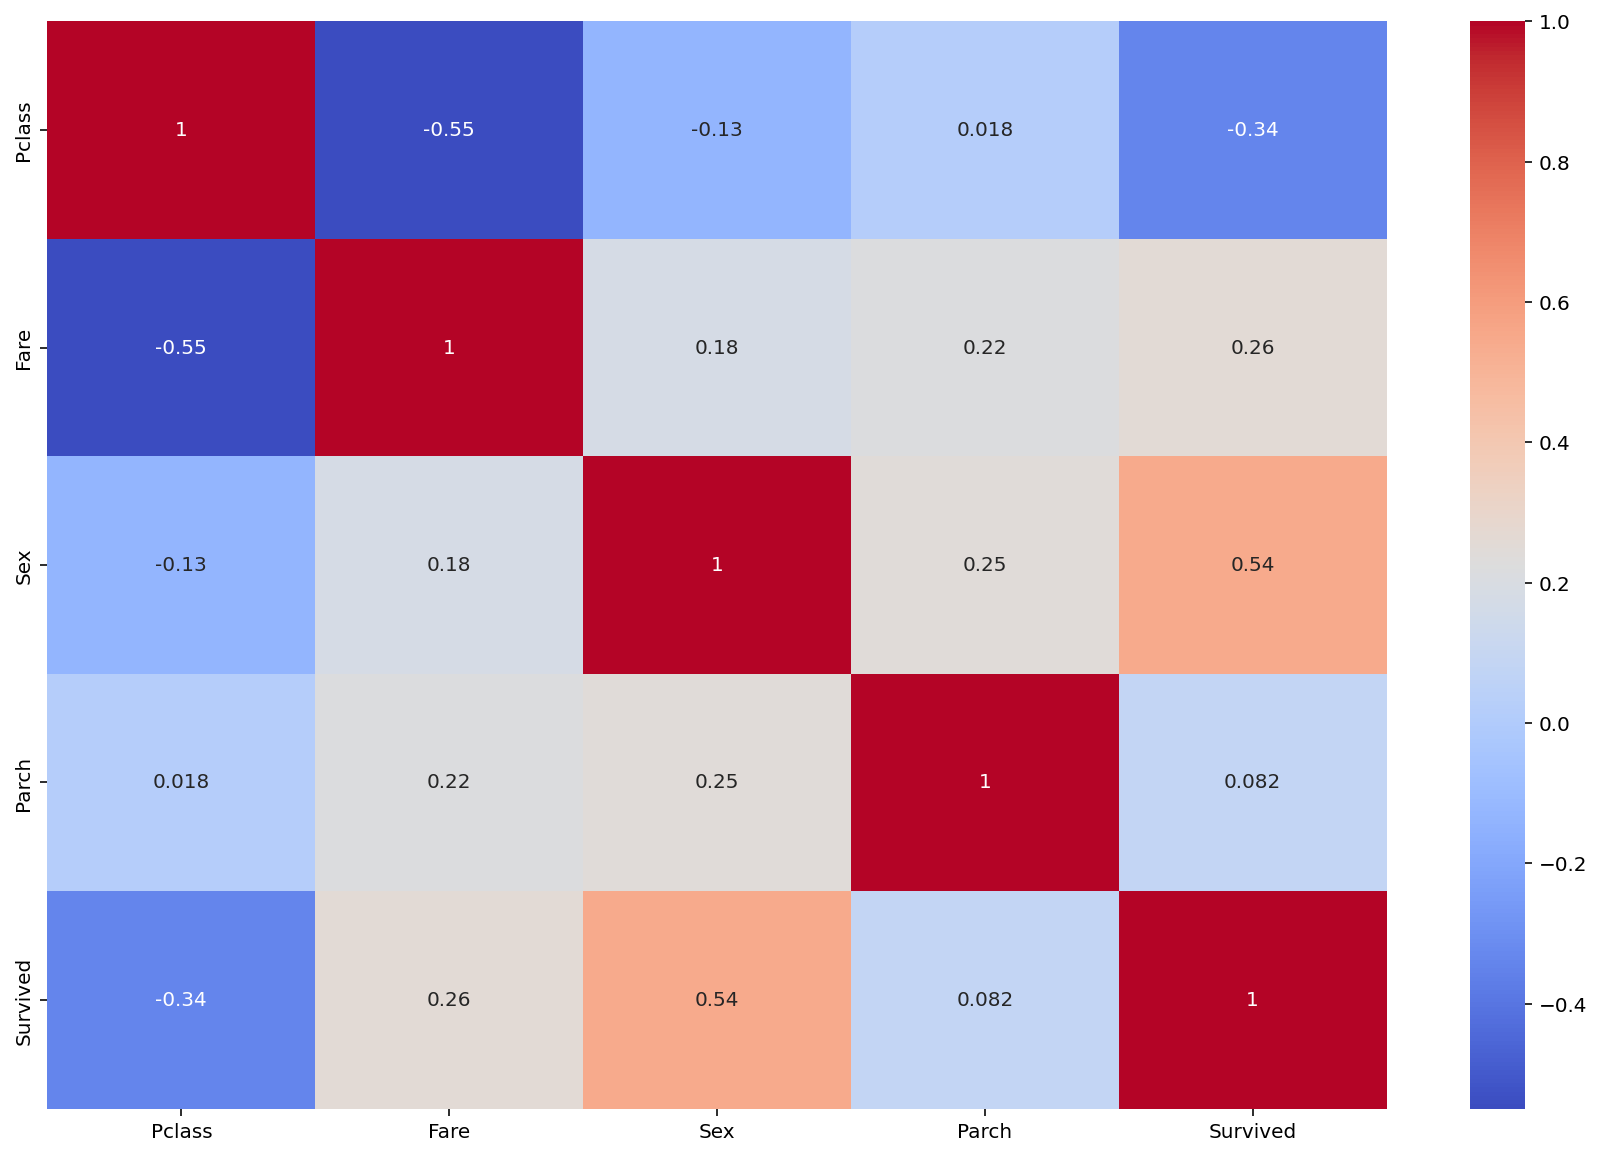

In [10]:
plt.figure(figsize = (15,10))
sns.heatmap(df_new.corr(), annot = True, cmap = 'coolwarm')

The correlatation between the features is low so I can keep them, without discarding features. The higher correlation (negative) is between 'Pclass' and 'Fare', but I considered that the correlation is not so high that I have to delete one of the two features.

So I used the decision tree classifier without setting the hyperparameters to use it as the base line model.

In [11]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



From the model I obtained a F1 score of about 80% so I continued applying the crossvalidation to the training set using 50 spilts and plotting the learning curves of the model

In [12]:
train_sizes = [i/10 for i in range (1,11)]

In [13]:
cv = ShuffleSplit(n_splits=50, test_size=0.3, random_state=0)

In [14]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = dt,
                                                            X = X_train,
                                                            y = y_train, train_sizes = train_sizes, cv = cv,
                                                            scoring = 'f1')

<module 'matplotlib.pyplot' from '/Users/giovannimezzasalma/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

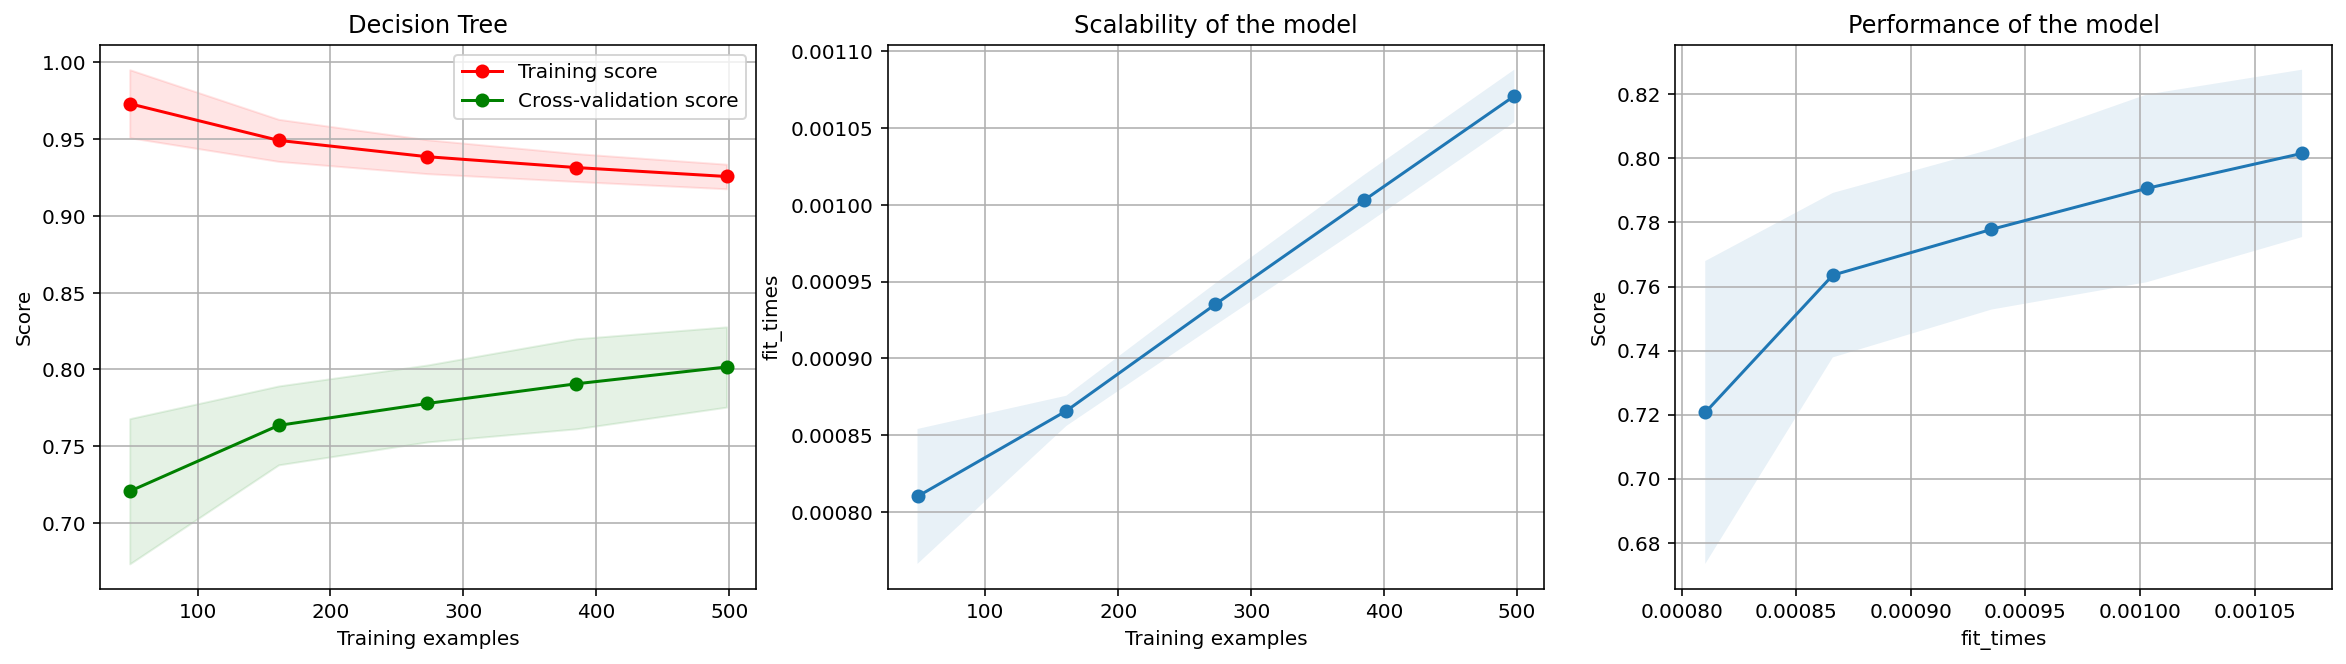

In [15]:
plot_learning_curve(dt,"Decision Tree", X_train,y_train,cv=cv)

From the learning curves is understandable that the model is overfitting because the model has a high F1 score on the traing set decreasing from 97% to 92% approx. The cross-validation score curve instead increase from 72% to 80% approx, so there is a large gap between the learning curves of about 12% with the entire dataset.
To addres the overfing I try to find the best hyperparameters for the Decision tree using 'GridSearch'

In [16]:
parameters = {'max_depth':[i for i in range(1,6)],
              'max_leaf_nodes':[i for i in range(1,6)],
              'min_samples_split':[i for i in range(2,4)],
              'min_samples_leaf':[i for i in range(1,6)],
              'criterion':['gini', 'entropy']}

grid = GridSearchCV(dt, parameters) 
grid.fit(X_train, y_train)
print('Model score =', grid.best_estimator_.score(X_test, y_test))
print('Model best parameters =', grid.best_params_)

Model score = 0.7932960893854749
Model best parameters = {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [17]:
dt=DecisionTreeClassifier(criterion= 'gini', max_depth= 3, max_leaf_nodes= 5,
                          min_samples_leaf= 1, min_samples_split= 2)
    
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       105
           1       0.79      0.68      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



The F1 score didn't changed significantly so i plot the learning curves.

In [18]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = dt,
                                                            X = X_train,
                                                            y = y_train, train_sizes = train_sizes, cv = cv,
                                                            scoring = 'f1')

<module 'matplotlib.pyplot' from '/Users/giovannimezzasalma/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

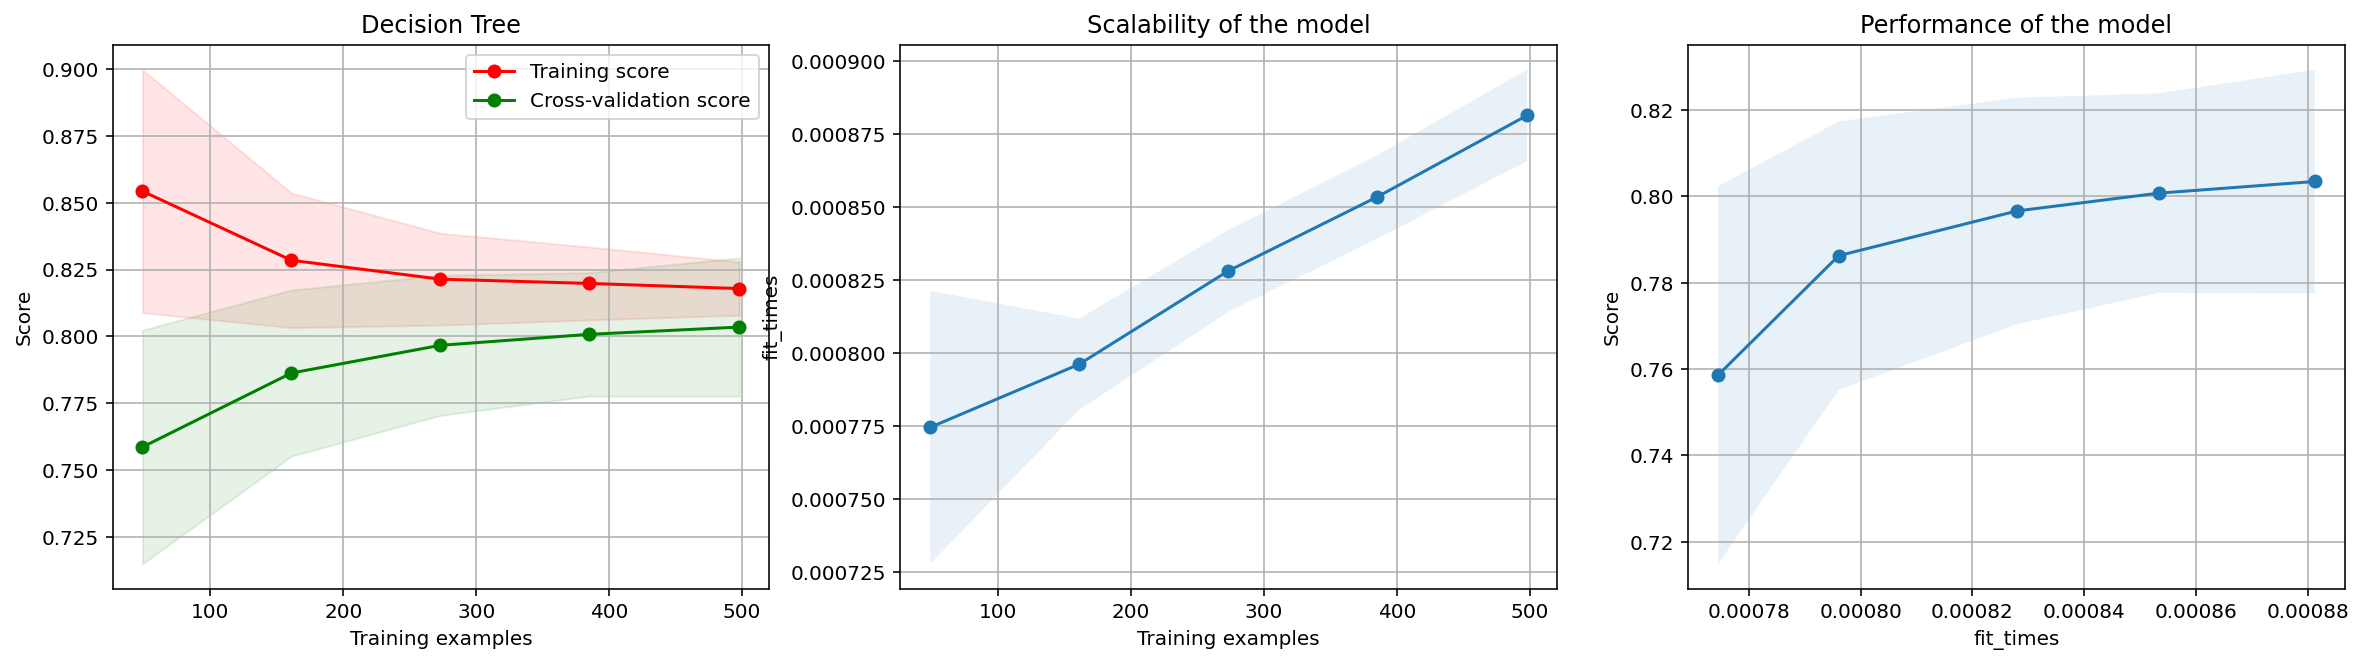

In [19]:
plot_learning_curve(dt,"Decision Tree", X_train,y_train,cv=cv)

From the chart is possible to see that the learning curve of training score decrased and the gap between the learning curves decreased down to 2% with the entire dataset.
To investigate if it's possible to improve the model I tryed to run a new 'GridSearch' to find the remaining best hyperparameters and visualize their effect on the model.

In [20]:
parameters = {'min_impurity_decrease':[i*0.1 for i in range(1,6)],
              'random_state':[i for i in range(1,6)],
              'splitter':['random', 'best']}

grid = GridSearchCV(dt, parameters) 
grid.fit(X_train, y_train)
print('Model score =', grid.best_estimator_.score(X_test, y_test))
print('Model best parameters =', grid.best_params_)

Model score = 0.7821229050279329
Model best parameters = {'min_impurity_decrease': 0.1, 'random_state': 1, 'splitter': 'random'}


In [21]:
dt=DecisionTreeClassifier(criterion= 'gini', max_depth= 3, max_leaf_nodes= 5,
                          min_samples_leaf= 1, min_samples_split= 2,
                          min_impurity_decrease=0.1,random_state=1,splitter='random')


dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [22]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = dt,
                                                            X = X_train,
                                                            y = y_train, train_sizes = train_sizes, cv = cv,
                                                            scoring = 'f1')

<module 'matplotlib.pyplot' from '/Users/giovannimezzasalma/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

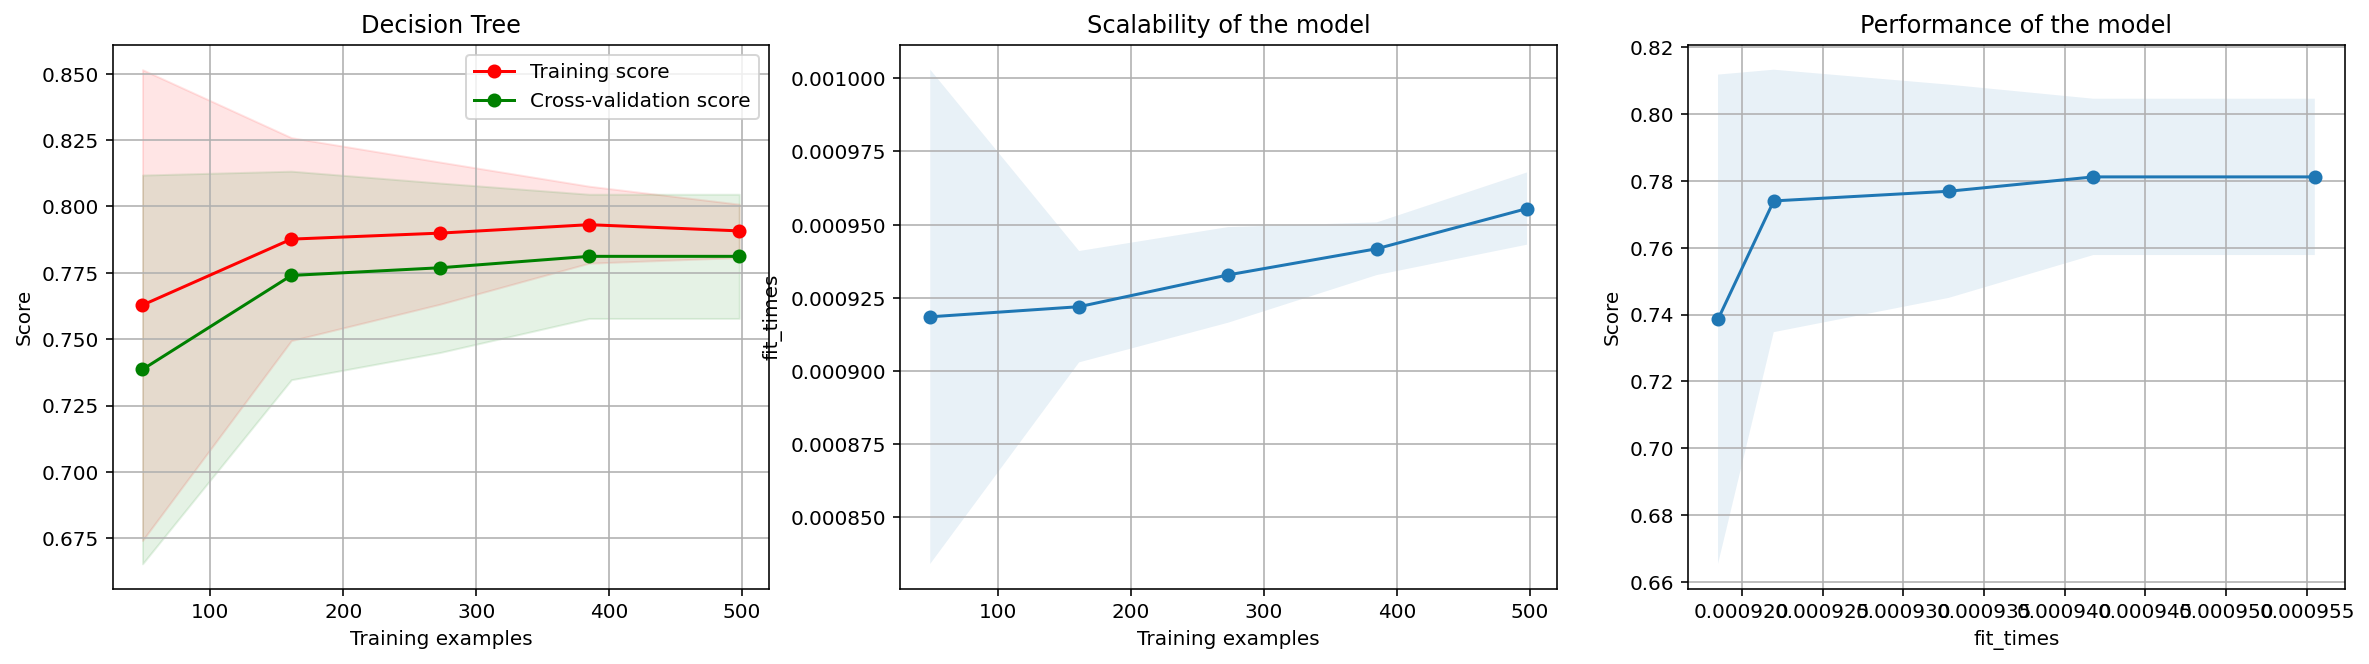

In [23]:
plot_learning_curve(dt,"Decision Tree", X_train,y_train,cv=cv)

The plot of the learning curves shows that the two curves behave similiarly, with a final score lower that the previous one. This is a clear sign of underfitting. So the latter hyperparameters did't improve the model, indeed they have made it worse.